In [65]:
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cufflinks as cf
cf.go_offline(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib 
import platform
if platform.system() == 'Windows': matplotlib.rc('font', family='Malgun Gothic')

In [3]:
rent=pd.read_csv("../전처리완csv/Seoul_rent.csv", engine='python')

In [49]:
rent.head()

,기간,광역상권,행정구역(구별),임대료(천원/㎡),공실률(%),투자수익률(%),소득수익률(%),자본수익률(%),시군구코드,ID
0,2017,도심(시내),종로구,69.2,1.1,7.02,5.01,1.94,11110,0
1,2017,도심(시내),종로구,36.5,10.9,5.92,3.88,1.98,11110,1
2,2017,도심(시내),중구,270.4,5.4,7.16,5.16,1.93,11140,2
3,2017,도심(시내),중구,85.2,4.2,7.55,5.74,1.74,11140,3
4,2017,도심(시내),종로구,84.2,2.7,7.49,4.87,2.53,11110,4


In [57]:
gu_list = rent['행정구역(구별)'].drop_duplicates().to_list()
gu_list

['종로구',
 '중구',
 '강남구',
 '서초구',
 '마포구',
 '영등포구',
 '광진구',
 '동대문구',
 '양천구',
 '은평구',
 '동작구',
 '관악구',
 '성북구',
 '강북구',
 '구로구',
 '성동구',
 '용산구',
 '송파구',
 '강동구',
 '강서구']

In [58]:
for name in gu_list:
    globals()['{}'.format(name)] = rent[rent['행정구역(구별)'] == name]
    globals()['mean_{}'.format(name)] = globals()['{}'.format(name)].mean()
#     globals()['{}'.format(name)].loc['평균'] = globals()['mean_{}'.format(name)]
    rent.loc['{}_평균'.format(name)] = globals()['mean_{}'.format(name)]
    rent.loc['{}_평균'.format(name),'행정구역(구별)'] = name

In [59]:
mean = rent.loc['종로구_평균':'강서구_평균']

In [60]:
mean.set_index('행정구역(구별)', inplace=True)

In [61]:
mean.reset_index(inplace=True)

In [62]:
mean.head(5)

,행정구역(구별),기간,광역상권,임대료(천원/㎡),공실률(%),투자수익률(%),소득수익률(%),자본수익률(%),시군구코드,ID
0,종로구,2018.000000,NaN,66.125000,7.183333,7.104167,4.026667,2.988333,11110.0,48.583333
1,중구,2018.181818,NaN,120.581818,6.260000,7.380000,4.143636,3.141818,11140.0,48.636364
2,강남구,2018.000000,NaN,66.676190,8.719048,7.961429,3.287143,4.564286,11680.0,48.238095
3,서초구,2018.000000,NaN,27.633333,6.266667,7.626667,3.870000,3.656667,11650.0,47.666667
4,마포구,2018.000000,NaN,54.966667,6.766667,7.868889,4.016667,3.737778,11440.0,54.000000


In [4]:
sale=pd.read_csv("../전처리완csv/seoul_sales.csv", engine='python')

In [5]:
sale.head()

,기준년코드,상권코드,시군구코드,상권구분코드명,업태구분명,점포수,남성매출비율,여성매출비율,10대매출비율,20대매출비율,...,남성매출건수,여성매출건수,10대매출건수,20대매출건수,30대매출건수,40대매출건수,50대매출건수,60대이상매출건수,ID,행정구역(구별)
0,2017,1000973,11740,골목상권,패스트푸드,1,43,57,1,21,...,1009,1324,23,487,733,609,310,171,0,강동구
1,2017,1000973,11740,골목상권,한식,18,59,41,1,17,...,4595,3481,94,1650,2209,1898,1431,800,1,강동구
2,2017,1000973,11740,골목상권,분식,2,42,58,4,15,...,2700,2900,98,606,1443,1082,1901,475,2,강동구
3,2017,1000973,11740,골목상권,치킨,4,57,44,1,22,...,1485,955,32,897,693,528,236,54,3,강동구
4,2017,1000973,11740,골목상권,카페,5,46,55,2,36,...,4469,6104,207,3674,3401,1832,1083,376,4,강동구


In [26]:
sale['총매출액']=sale['남성매출금액']+sale['여성매출금액']

In [29]:
sale.drop('총매출',axis=1)

,level_0,index,기준년코드,상권코드,시군구코드,상권구분코드명,업태구분명,점포수,남성매출비율,여성매출비율,...,여성매출건수,10대매출건수,20대매출건수,30대매출건수,40대매출건수,50대매출건수,60대이상매출건수,ID,행정구역(구별),총매출액
0,0,0,2017,1000973,11740,골목상권,패스트푸드,1,43,57,...,1324,23,487,733,609,310,171,0,강동구,63291825
1,1,1,2017,1000973,11740,골목상권,한식,18,59,41,...,3481,94,1650,2209,1898,1431,800,1,강동구,182823540
2,2,2,2017,1000973,11740,골목상권,분식,2,42,58,...,2900,98,606,1443,1082,1901,475,2,강동구,55157106
3,3,3,2017,1000973,11740,골목상권,치킨,4,57,44,...,955,32,897,693,528,236,54,3,강동구,53978728
4,4,4,2017,1000973,11740,골목상권,카페,5,46,55,...,6104,207,3674,3401,1832,1083,376,4,강동구,62908091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107159,107159,107159,2019,1000218,11230,골목상권,치킨,1,61,39,...,364,33,197,220,163,178,135,107159,동대문구,14350715
107160,107160,107160,2019,1000190,11230,골목상권,분식,4,50,50,...,234,0,378,115,92,26,9,107160,동대문구,4751038
107161,107161,107161,2019,1000615,11530,골목상권,일식,1,58,42,...,3957,187,2855,1767,2865,1090,610,107161,구로구,107317646
107162,107162,107162,2019,1001416,11500,전통시장,카페,1,51,49,...,907,15,777,392,358,262,54,107162,강서구,13364379


In [30]:
sales=sale.groupby(['업태구분명','행정구역(구별)'])['총매출액'].sum()
sales_a=pd.DataFrame(sales)

In [39]:
saled=sale.groupby(['업태구분명','행정구역(구별)'])['점포수'].sum()
sales_b=pd.DataFrame(saled)

In [31]:
sales_a

총매출액
업태구분명 행정구역(구별)               
분식    강남구        701085042229
      강동구        154303230373
      강북구         64295586056
      강서구         81094837249
      관악구        181791697565
...                       ...
한식    용산구        830591958728
      은평구        483330378626
      종로구       2007858515842
      중구        1925103662455
      중랑구        495281937909

[225 rows x 1 columns]

In [36]:
salesf = sales_a.reset_index()

In [37]:
salesf

,업태구분명,행정구역(구별),총매출액
0,분식,강남구,701085042229
1,분식,강동구,154303230373
2,분식,강북구,64295586056
3,분식,강서구,81094837249
4,분식,관악구,181791697565
...,...,...,...
220,한식,용산구,830591958728
221,한식,은평구,483330378626
222,한식,종로구,2007858515842
223,한식,중구,1925103662455


In [41]:
salesg=sales_b.reset_index()

In [46]:
sums=salesg.merge(salesf,on=['행정구역(구별)','업태구분명'])
sums

,업태구분명,행정구역(구별),점포수,총매출액
0,분식,강남구,12627,701085042229
1,분식,강동구,4290,154303230373
2,분식,강북구,2572,64295586056
3,분식,강서구,3390,81094837249
4,분식,관악구,5621,181791697565
...,...,...,...,...
220,한식,용산구,14406,830591958728
221,한식,은평구,11539,483330378626
222,한식,종로구,35113,2007858515842
223,한식,중구,35426,1925103662455


In [48]:
sums['평균매출액']=sums['총매출액']/sums['점포수']
sums

,업태구분명,행정구역(구별),점포수,총매출액,평균매출액
0,분식,강남구,12627,701085042229,5.552269e+07
1,분식,강동구,4290,154303230373,3.596812e+07
2,분식,강북구,2572,64295586056,2.499828e+07
3,분식,강서구,3390,81094837249,2.392178e+07
4,분식,관악구,5621,181791697565,3.234152e+07
...,...,...,...,...,...
220,한식,용산구,14406,830591958728,5.765597e+07
221,한식,은평구,11539,483330378626,4.188668e+07
222,한식,종로구,35113,2007858515842,5.718277e+07
223,한식,중구,35426,1925103662455,5.434155e+07


In [53]:
sums_j=sums.loc[sums['업태구분명']=='주점']
sums_ju=pd.DataFrame(sums_j)

In [71]:
sums_ju.head(5)

,업태구분명,행정구역(구별),점포수,총매출액,평균매출액
75,주점,강남구,10457,702518699381,6.718167e+07
76,주점,강동구,7038,283541409983,4.028721e+07
77,주점,강북구,5201,227329449460,4.370880e+07
78,주점,강서구,6475,251512671028,3.884366e+07
79,주점,관악구,8382,455119553254,5.429725e+07


In [73]:
sums_c=sums.loc[sums['업태구분명']=='카페']
sums_ca=pd.DataFrame(sums_c)

In [74]:
sums_ca.head(5)

,업태구분명,행정구역(구별),점포수,총매출액,평균매출액
150,카페,강남구,19831,1124968458425,5.672777e+07
151,카페,강동구,4409,130807497441,2.966829e+07
152,카페,강북구,1897,61679055345,3.251400e+07
153,카페,강서구,2892,75602134515,2.614182e+07
154,카페,관악구,4862,204263103705,4.201216e+07


In [72]:
sumfin=pd.merge(sums_ju,mean,left_on='행정구역(구별)',right_on='행정구역(구별)',how='inner')
sumfin.head(5)

,업태구분명,행정구역(구별),점포수,총매출액,평균매출액,기간,광역상권,임대료(천원/㎡),공실률(%),투자수익률(%),소득수익률(%),자본수익률(%),시군구코드,ID
0,주점,강남구,10457,702518699381,6.718167e+07,2018.0,NaN,66.676190,8.719048,7.961429,3.287143,4.564286,11680.0,48.238095
1,주점,강동구,7038,283541409983,4.028721e+07,2018.0,NaN,35.833333,7.300000,6.893333,2.570000,4.243333,11740.0,72.666667
2,주점,강북구,5201,227329449460,4.370880e+07,2018.0,NaN,56.800000,5.066667,6.386667,4.396667,1.926667,11305.0,64.666667
3,주점,강서구,6475,251512671028,3.884366e+07,2018.0,NaN,28.633333,10.733333,7.750000,3.186667,4.450000,11500.0,75.666667
4,주점,관악구,8382,455119553254,5.429725e+07,2018.0,NaN,68.400000,3.550000,7.438333,4.323333,3.018333,11620.0,64.166667


Text(66.67619047619048, 67181667.72315195, '강남구')

Text(35.833333333333336, 40287213.69465757, '강동구')

Text(56.800000000000004, 43708796.28148433, '강북구')

Text(28.633333333333336, 38843655.757220075, '강서구')

Text(68.39999999999999, 54297250.44786447, '관악구')

Text(47.43333333333333, 55103588.19424779, '광진구')

Text(43.4, 39726063.814141065, '구로구')

Text(37.87777777777777, 32749311.661511004, '동대문구')

Text(58.43333333333334, 47682046.52951192, '동작구')

Text(54.96666666666667, 56064858.68898121, '마포구')

Text(27.633333333333336, 66688994.03806228, '서초구')

Text(38.833333333333336, 51485264.121733785, '성동구')

Text(44.300000000000004, 44155962.96696823, '성북구')

Text(42.96666666666667, 52002594.50990296, '송파구')

Text(34.1, 30931574.322150845, '양천구')

Text(38.96666666666667, 43160935.141964406, '영등포구')

Text(36.516666666666666, 75579193.42298697, '용산구')

Text(37.56666666666666, 34154511.44538545, '은평구')

Text(66.12500000000001, 58215311.36176817, '종로구')

Text(120.58181818181819, 44630468.850681536, '중구')

Text(0.5, 0, '2017-2019년 평균 임대료(천원/㎡)')

Text(0, 0.5, '2017-2019년 주점 평균 매출액')

Text(0.5, 1.0, '2017년-2019년 구별 평균 임대료와 주점 평균 매출액 산점도')

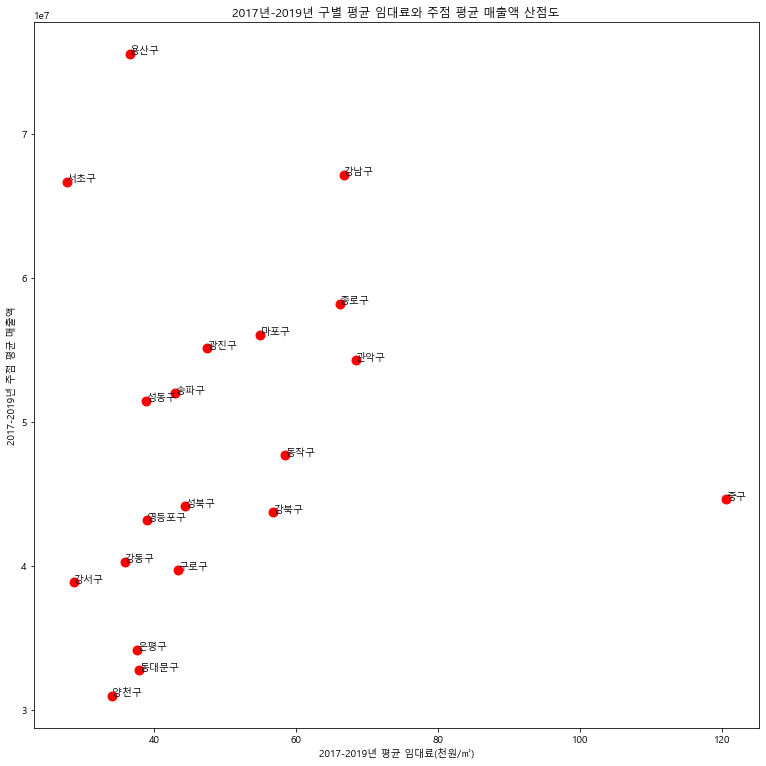

In [79]:

fig, ax = plt.subplots()
my_scatter_plot = ax.scatter(
sumfin["임대료(천원/㎡)"], 
sumfin["평균매출액"],
color='r'
,s=80, 
)
plt.gcf().set_size_inches((13, 13)) 

for i, txt in enumerate(sumfin["행정구역(구별)"]):
    plt.annotate(txt, (sumfin["임대료(천원/㎡)"][i], sumfin["평균매출액"] [i]))

ax.set_xlabel("2017-2019년 평균 임대료(천원/㎡)")
ax.set_ylabel('2017-2019년 주점 평균 매출액')
ax.set_title("2017년-2019년 구별 평균 임대료와 주점 평균 매출액 산점도")


In [77]:
sumca=pd.merge(sums_ca,mean,left_on='행정구역(구별)',right_on='행정구역(구별)',how='inner')
sumca.head(5)

,업태구분명,행정구역(구별),점포수,총매출액,평균매출액,기간,광역상권,임대료(천원/㎡),공실률(%),투자수익률(%),소득수익률(%),자본수익률(%),시군구코드,ID
0,카페,강남구,19831,1124968458425,5.672777e+07,2018.0,NaN,66.676190,8.719048,7.961429,3.287143,4.564286,11680.0,48.238095
1,카페,강동구,4409,130807497441,2.966829e+07,2018.0,NaN,35.833333,7.300000,6.893333,2.570000,4.243333,11740.0,72.666667
2,카페,강북구,1897,61679055345,3.251400e+07,2018.0,NaN,56.800000,5.066667,6.386667,4.396667,1.926667,11305.0,64.666667
3,카페,강서구,2892,75602134515,2.614182e+07,2018.0,NaN,28.633333,10.733333,7.750000,3.186667,4.450000,11500.0,75.666667
4,카페,관악구,4862,204263103705,4.201216e+07,2018.0,NaN,68.400000,3.550000,7.438333,4.323333,3.018333,11620.0,64.166667


Text(66.67619047619048, 56727772.59971762, '강남구')

Text(35.833333333333336, 29668291.549330913, '강동구')

Text(56.800000000000004, 32513998.60042172, '강북구')

Text(28.633333333333336, 26141816.913900416, '강서구')

Text(68.39999999999999, 42012156.25359934, '관악구')

Text(47.43333333333333, 43168046.77340535, '광진구')

Text(43.4, 41685025.53023388, '구로구')

Text(37.87777777777777, 38427214.558012635, '동대문구')

Text(58.43333333333334, 43431538.152957484, '동작구')

Text(54.96666666666667, 50935346.7164022, '마포구')

Text(27.633333333333336, 52465107.49898125, '서초구')

Text(38.833333333333336, 28862346.82068742, '성동구')

Text(44.300000000000004, 41876365.45567427, '성북구')

Text(42.96666666666667, 57343561.996235885, '송파구')

Text(34.1, 18334315.092361458, '양천구')

Text(38.96666666666667, 51432836.829797894, '영등포구')

Text(36.516666666666666, 47830971.25398812, '용산구')

Text(37.56666666666666, 24887618.837024655, '은평구')

Text(66.12500000000001, 56608230.71310116, '종로구')

Text(120.58181818181819, 65221070.25844071, '중구')

Text(0.5, 0, '2017-2019년 평균 임대료(천원/㎡)')

Text(0, 0.5, '2017-2019년 카페 평균 매출액')

Text(0.5, 1.0, '2017년-2019년 구별 평균 임대료와 카페 평균 매출액 산점도')

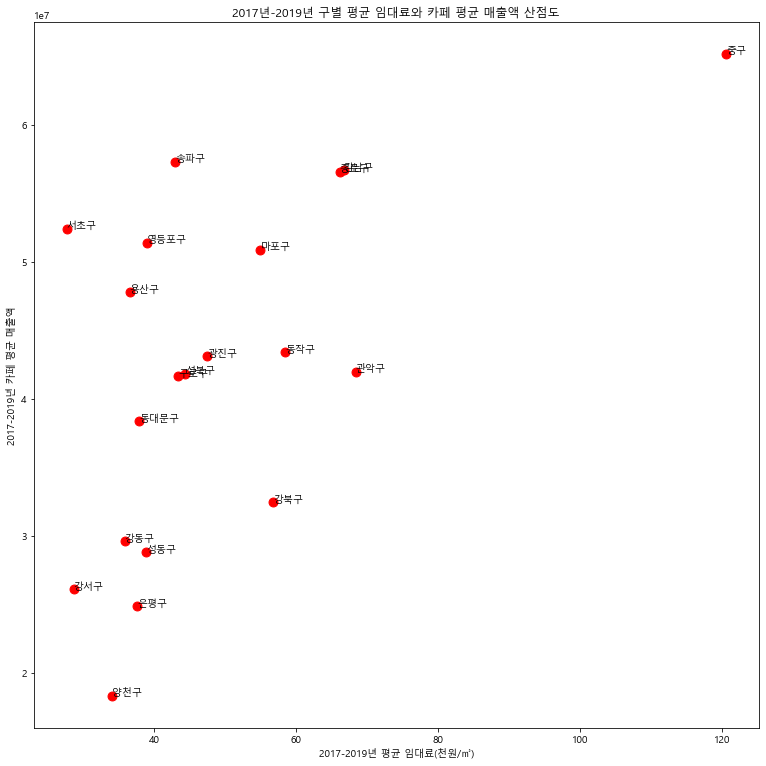

In [80]:

fig, ax = plt.subplots()
my_scatter_plot = ax.scatter(
sumca["임대료(천원/㎡)"], 
sumca["평균매출액"],
color='r'
,s=80, 
)
plt.gcf().set_size_inches((13, 13)) 

for i, txt in enumerate(sumca["행정구역(구별)"]):
    plt.annotate(txt, (sumca["임대료(천원/㎡)"][i], sumca["평균매출액"] [i]))

ax.set_xlabel("2017-2019년 평균 임대료(천원/㎡)")
ax.set_ylabel('2017-2019년 카페 평균 매출액')
ax.set_title("2017년-2019년 구별 평균 임대료와 카페 평균 매출액 산점도")